In [37]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [38]:
# Loading data
file_path = Path("Resources/clean_data.csv")
df1 = pd.read_csv(file_path)
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,2,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,3,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,4,1,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [39]:
df1.drop(columns=['id'], inplace = True)

In [40]:
numeric= pd.get_dummies(df1)
numeric

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,70.15,29.8,0,0,1,0,0,1,0,0,1,0,0
4977,1,40.0,0,0,1,191.15,31.1,0,0,1,0,0,0,1,0,0,0,1
4978,0,45.0,1,0,1,95.02,31.8,0,1,0,0,0,1,0,0,0,0,1
4979,1,40.0,0,0,1,83.94,30.0,0,0,1,0,0,1,0,0,0,0,1


In [41]:
# Define features set
X = numeric.copy()
X.drop("stroke", axis=1, inplace=True)
X.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,228.69,36.6,0,1,0,0,0,1,0,1,0,0
1,1,80.0,0,1,1,105.92,32.5,0,1,0,0,1,0,0,0,1,0
2,0,49.0,0,0,1,171.23,34.4,0,1,0,0,0,1,0,0,0,1
3,0,79.0,1,0,1,174.12,24.0,0,0,1,0,1,0,0,0,1,0
4,1,81.0,0,0,1,186.21,29.0,0,1,0,0,0,1,0,1,0,0


In [42]:
# Define target vector
y = numeric["stroke"].values .reshape(-1, 1)
y


array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [43]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [44]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [45]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [46]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [47]:
# Creating the Random Forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [48]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\Celvir\AppData\Local\Temp\ipykernel_9608\478868177.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [49]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [50]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [51]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1173,1
Actual 1,72,0


Accuracy Score : 0.9414125200642055
Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1174
           1       0.00      0.00      0.00        72

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.48      1246
weighted avg       0.89      0.94      0.91      1246



# Oversampling the data

In [52]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res, y_res = ros.fit_resample(X, y)

In [53]:
# Count the distinct values of the resampled labels data
pd.value_counts(y_res)


1    4733
0    4733
dtype: int64

In [54]:
# Fitting Standard Scaller
#X_scaler = scaler.fit(X_res)
# Scaling data
X_train_scaled = X_scaler.transform(X_res)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Creating the Random Forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_res)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [56]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [57]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1174,0
Actual 1,0,72


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1174
           1       1.00      1.00      1.00        72

    accuracy                           1.00      1246
   macro avg       1.00      1.00      1.00      1246
weighted avg       1.00      1.00      1.00      1246



In [58]:
# Calculate Features importance
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# Sort by importance (impurity-based )
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3827382323595084, 'age'),
 (0.1981305486707815, 'avg_glucose_level'),
 (0.17891734613062946, 'bmi'),
 (0.03241526603034582, 'ever_married'),
 (0.028552048110597434, 'hypertension'),
 (0.022753342597742553, 'gender'),
 (0.01982566858591841, 'heart_disease'),
 (0.01777739847820651, 'smoking_status_never smoked'),
 (0.014154119159235068, 'work_type_Self-employed'),
 (0.014138474097151072, 'work_type_Private'),
 (0.014005989707817978, 'smoking_status_formerly smoked'),
 (0.013418584017946053, 'Residence_type_Rural'),
 (0.013313334863657742, 'Residence_type_Urban'),
 (0.013299610639420062, 'smoking_status_smokes'),
 (0.013127897028329826, 'work_type_children'),
 (0.012990875942672737, 'smoking_status_Unknown'),
 (0.010441263580039488, 'work_type_Govt_job')]

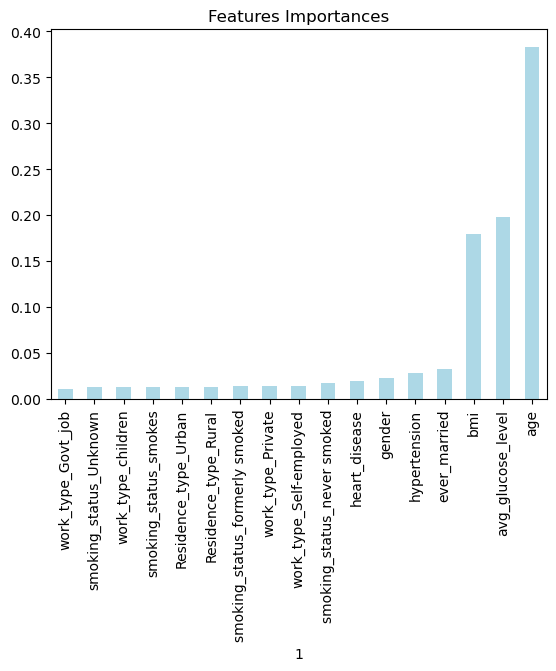

In [76]:
# Visualize the features by importance

importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
figure=importances_sorted.plot(kind='bar', color='lightblue', title= 'Features Importances', legend=False)
import matplotlib.pyplot as plt
plt.savefig("./Images/Features_importance.png")

----